In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

from scipy import stats

from dependencies import (
    perform_kmeans_clustering, 
    get_annual_return, 
    perform_polynomial_on_clustering, 
    combine_polynomial_plots,
    POLYNOMIAL_DEGREE
)

In [2]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [3]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame["Year"] = data_frame["Date"].dt.year
data_frame["Week"] = data_frame["Date"].dt.isocalendar().week

processing_years = [year for year in range(2000, 2024)]
weeks = [month for month in range(1, 49)]
data_frame_weekly_returns = []
 
for year in processing_years:
    for week in weeks:
        filtered_data = data_frame[(data_frame['Year'] == year) & (data_frame['Week'] == week)]
        for column in filtered_data.columns:
            if column not in ["Date", "Year", "Week"] and not filtered_data.empty:
                weekly_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
                weekly_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
               
                relative_percentile = stats.percentileofscore(weekly_returns, weekly_return)
                data_frame_weekly_returns.append({'Stock': column, 'Year': year, 'Week': week, 'Weekly_Return': weekly_return, 'Relative_Percentile': relative_percentile})

data_frame_weekly_percentile = pd.DataFrame(data_frame_weekly_returns)
data_frame_weekly_percentile.tail()

,Stock,Year,Week,Weekly_Return,Relative_Percentile
420475,TRMB,2023,48,6.666664,100.0
420476,ZBRA,2023,48,4.198705,100.0
420477,LNT,2023,48,3.062456,100.0
420478,BBWI,2023,48,11.737550,100.0
420479,WBA,2023,48,3.381402,100.0


In [4]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame["Year"] = data_frame["Date"].dt.year
data_frame["Month"] = data_frame["Date"].dt.month

processing_years = [year for year in range(2000, 2024)]
months = [month for month in range(1, 13)]
data_frame_monthly_returns = []
 
for year in processing_years:
    for month in months:
        filtered_data = data_frame[(data_frame['Year'] == year) & (data_frame['Month'] == month)]
        for column in filtered_data.columns:
            if column not in ["Date", "Year", "Month"] and not filtered_data.empty:
                monthly_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
                monthly_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
               
                relative_percentile = stats.percentileofscore(monthly_returns, monthly_return)
                data_frame_monthly_returns.append({'Stock': column, 'Year': year, 'Month': month, 'Monthly_Return': monthly_return, 'Relative_Percentile': relative_percentile})

data_frame_monthly_percentile = pd.DataFrame(data_frame_monthly_returns)
data_frame_monthly_percentile.tail()

E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversi

,Stock,Year,Month,Monthly_Return,Relative_Percentile
105403,ZBRA,2023,12,13.311494,85.0
105404,LNT,2023,12,-0.369010,50.0
105405,BBWI,2023,12,27.353205,95.0
105406,WBA,2023,12,25.589224,80.0
105407,Week,2023,12,8.333333,92.5


In [5]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame["Year"] = data_frame["Date"].dt.year
data_frame["Quarter"] = data_frame["Date"].dt.quarter

processing_years = [year for year in range(2000, 2024)]
quarters = [1, 2, 3, 4]
data_frame_quarterly_returns = []

for year in processing_years:
    for quarter in quarters:
        filtered_data = data_frame[(data_frame['Year'] == year) & (data_frame['Quarter'] == quarter)]
        for column in filtered_data.columns:
            if column not in ["Date", "Year", "Quarter"] and not filtered_data.empty:
                quarter_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
                quarter_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
               
                relative_percentile = stats.percentileofscore(quarter_returns, quarter_return)
                data_frame_quarterly_returns.append({'Stock': column, 'Year': year, 'Quarter': quarter, 'Quarterly_Return': quarter_return, 'Relative_Percentile': relative_percentile})

data_frame_quarter_percentile = pd.DataFrame(data_frame_quarterly_returns)
data_frame_quarter_percentile.tail()

E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversi

,Stock,Year,Quarter,Quarterly_Return,Relative_Percentile
35227,LNT,2023,4,10.942900,84.126984
35228,BBWI,2023,4,28.567173,98.412698
35229,WBA,2023,4,16.458524,93.650794
35230,Week,2023,4,30.000000,97.619048
35231,Month,2023,4,20.000000,84.920635


In [6]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year

processing_years = [year for year in range(2000, 2025)]
data_frame_annual_returns = []

for year in processing_years:
    filtered_data = data_frame[data_frame['Year'] == year]
    for column in filtered_data.columns:
        if column not in ["Date", "Year"]:
            annual_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
            annual_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
           
            relative_percentile = stats.percentileofscore(annual_returns, annual_return)
            data_frame_annual_returns.append({'Stock': column, 'Year': year, 'Annual_Return': annual_return, 'Relative_Percentile': relative_percentile})


data_frame_annual_percentile = pd.DataFrame(data_frame_annual_returns)

In [7]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year
data_frame["Quarter"] = data_frame["Date"].dt.quarter

start_year = 2000
end_year = 2022
quarters = [1, 2, 3, 4]

data_frame_rolling_returns = []

for year in range(start_year, end_year): 
    for quarter in quarters:
        filtered_data_frame_1 = data_frame[((data_frame['Year'] == year) & (data_frame['Quarter'] >= quarter))]
        filtered_data_frame_2 = data_frame[(data_frame['Year'] == year + 1)]
        filtered_data_frame_3 = data_frame[((data_frame['Year'] == year + 2) & (data_frame['Quarter'] < quarter))]
        
        filtered_data = pd.concat([filtered_data_frame_1, filtered_data_frame_2, filtered_data_frame_3])
        filtered_data = filtered_data.reset_index(drop=True)
        
        for column in filtered_data.columns:
            if column not in ["Date", "Year", "Quarter"] and not filtered_data.empty:
                rolling_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
                rolling_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
                relative_percentile = stats.percentileofscore(rolling_returns, rolling_return)
                data_frame_rolling_returns.append({'Stock': column, 'Year': year, 'Quarter': quarter, '2_Years_Rolling_Return': rolling_return, 'Relative_Percentile': relative_percentile})

data_frame_2_years_rolling_percentile = pd.DataFrame(data_frame_rolling_returns)
data_frame_2_years_rolling_percentile.head(100)


E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversi

,Stock,Year,Quarter,2_Years_Rolling_Return,Relative_Percentile
0,APA,2000,1,60.785345,49.8
1,MTCH,2000,1,0.450574,96.3
2,GEN,2000,1,16.624176,84.8
3,DXC,2000,1,-47.474530,38.4
4,EG,2000,1,223.199986,90.0
...,...,...,...,...,...
95,WEC,2000,1,18.347541,81.0
96,ECL,2000,1,6.799337,71.4
97,LEG,2000,1,11.854103,91.3
98,NEE,2000,1,36.727273,55.6


In [8]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year
data_frame["Quarter"] = data_frame["Date"].dt.quarter

start_year = 2000
end_year = 2019
quarters = [1, 2, 3, 4]

data_frame_rolling_returns = []

for year in range(start_year, end_year): 
    for quarter in quarters:
        filtered_data_frame_1 = data_frame[((data_frame['Year'] == year) & (data_frame['Quarter'] >= quarter))]
        filtered_data_frame_2 = data_frame[((data_frame['Year'] >= year + 1) & (data_frame['Year'] <= year + 4))]
        filtered_data_frame_3 = data_frame[((data_frame['Year'] == year + 5) & (data_frame['Quarter'] < quarter))]
        
        filtered_data = pd.concat([filtered_data_frame_1, filtered_data_frame_2, filtered_data_frame_3])
        filtered_data = filtered_data.reset_index(drop=True)
        
        for column in filtered_data.columns:
            if column not in ["Date", "Year", "Quarter"] and not filtered_data.empty:
                rolling_return = get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[-1])
                rolling_returns = [get_annual_return(filtered_data[column].iloc[0], filtered_data[column].iloc[i]) for i in range(len(filtered_data))]  
                relative_percentile = stats.percentileofscore(rolling_returns, rolling_return)
                data_frame_rolling_returns.append({'Stock': column, 'Year': year, 'Quarter': quarter, '5_Years_Rolling_Return': rolling_return, 'Relative_Percentile': relative_percentile})

data_frame_5_years_rolling_percentile = pd.DataFrame(data_frame_rolling_returns)
data_frame_5_years_rolling_percentile.head(100)


E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversion-framework\dependencies.py:85: RuntimeWarning: overflow encountered in scalar subtract
  return ((final_value - initial_value) / initial_value) * 100
E:\Alphablock\clustering-in-mean-reversi

,Stock,Year,Quarter,5_Years_Rolling_Return,Relative_Percentile
0,APA,2000,1,242.320006,97.133758
1,MTCH,2000,1,1.590805,65.167197
2,GEN,2000,1,262.338462,95.063694
3,DXC,2000,1,-39.549601,76.035032
4,EG,2000,1,309.417134,99.522293
...,...,...,...,...,...
95,WEC,2000,1,76.839344,97.611465
96,ECL,2000,1,86.427866,99.601911
97,LEG,2000,1,38.261398,97.452229
98,NEE,2000,1,81.212121,99.283439


Text(0.5, 1.0, 'Correlation Matrix (Updated)')

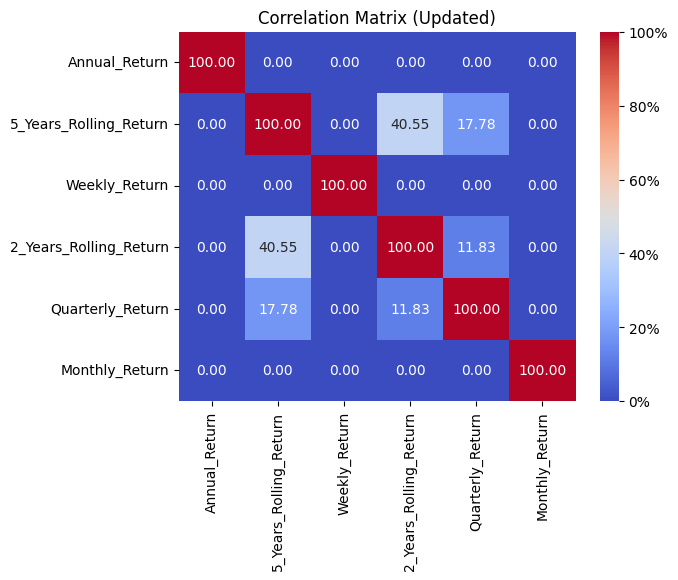

In [25]:
import numpy as np

combined_df  = pd.concat([data_frame_annual_percentile['Annual_Return'], 
                         data_frame_5_years_rolling_percentile['5_Years_Rolling_Return'], 
                         data_frame_weekly_percentile['Weekly_Return'], 
                         data_frame_2_years_rolling_percentile['2_Years_Rolling_Return'], 
                         data_frame_quarter_percentile['Quarterly_Return'], 
                         data_frame_monthly_percentile['Monthly_Return']], 
                        axis=1)


corr_matrix_updated = combined_df[['Annual_Return', '5_Years_Rolling_Return', 'Weekly_Return', '2_Years_Rolling_Return', 'Quarterly_Return', 'Monthly_Return']].corr()

threshold = 0.009
df_adjusted = corr_matrix_updated.where(np.abs(corr_matrix_updated) >= threshold, 0)

df_percent = df_adjusted * 100

plt.figure()
sns.heatmap(df_percent, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'format': '%.0f%%'})
plt.title('Correlation Matrix (Updated)')

In [22]:
from dependencies import get_polynomial_features

xs, ys, xs_pred_weekly, y_pred_weekly = get_polynomial_features(data_frame_weekly_percentile, ['Relative_Percentile', 'Weekly_Return'])
xs, ys, xs_pred_monthly, y_pred_monthly = get_polynomial_features(data_frame_monthly_percentile, ['Relative_Percentile', 'Monthly_Return'])
xs, ys, xs_pred_quarterly, y_pred_quarterly = get_polynomial_features(data_frame_quarter_percentile, ['Relative_Percentile', 'Quarterly_Return'])
xs, ys, xs_pred_annual, y_pred_annual = get_polynomial_features(data_frame_annual_percentile, ['Relative_Percentile', 'Annual_Return'])
xs, ys, xs_pred_2_years_rolling, y_pred_2_years_rolling = get_polynomial_features(data_frame_2_years_rolling_percentile, ['Relative_Percentile', '2_Years_Rolling_Return'])
xs, ys, xs_pred_5_years_rolling, y_pred_5_years_rolling = get_polynomial_features(data_frame_5_years_rolling_percentile, ['Relative_Percentile', '5_Years_Rolling_Return'])

In [23]:
import numpy as np

regression_array = [
    [xs_pred_weekly, y_pred_weekly, 'Weekly', 'blue'],
    [xs_pred_monthly, y_pred_monthly, 'Monthly', 'green'],
    [xs_pred_quarterly, y_pred_quarterly, 'Quarterly', 'red'],
    [xs_pred_annual, y_pred_annual, 'Annual', 'cyan'],
    [xs_pred_2_years_rolling, y_pred_2_years_rolling, '2 Years Rolling', 'magenta'],
    [xs_pred_5_years_rolling, y_pred_5_years_rolling,  '5 Years Rolling', 'black'],
]

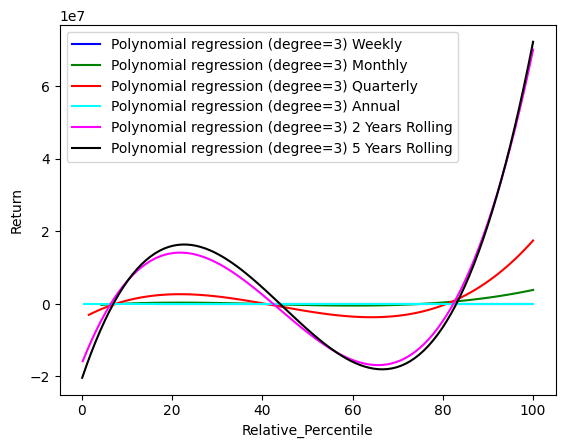

In [24]:
index = 0
for arr in regression_array:
    plt.plot(arr[0], arr[1], color=arr[3], label=f'Polynomial regression (degree={POLYNOMIAL_DEGREE}) {arr[2]}')
    index += 1

plt.xlabel('Relative_Percentile')
plt.ylabel('Return')
plt.legend()
plt.show()